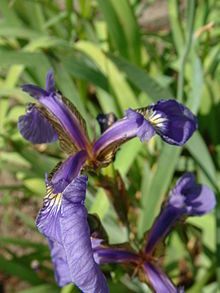

In [1]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width = 300,height=300)

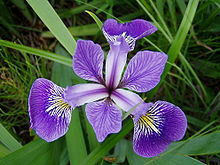

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg'
Image(url,width = 300,height=300)

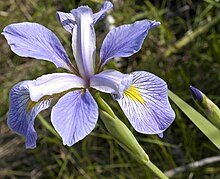

In [3]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg'
Image(url,width =300,height=300)

In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
X = iris.data
Y=iris.target

In [8]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris_data = DataFrame(X,columns=['Sepeal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])

In [10]:
def flower(num):
    if num==0:
        return 'Setosa'

    elif num==1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [11]:
iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [12]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [13]:
iris

,Sepeal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


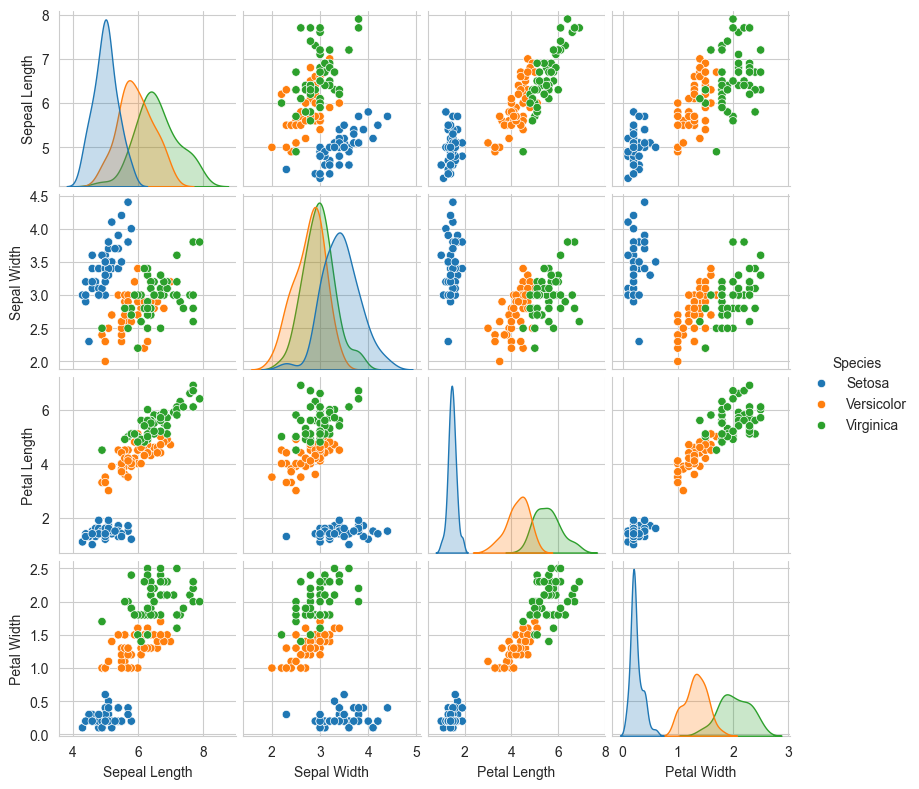

In [14]:
sns.pairplot(iris,hue='Species',height=2)

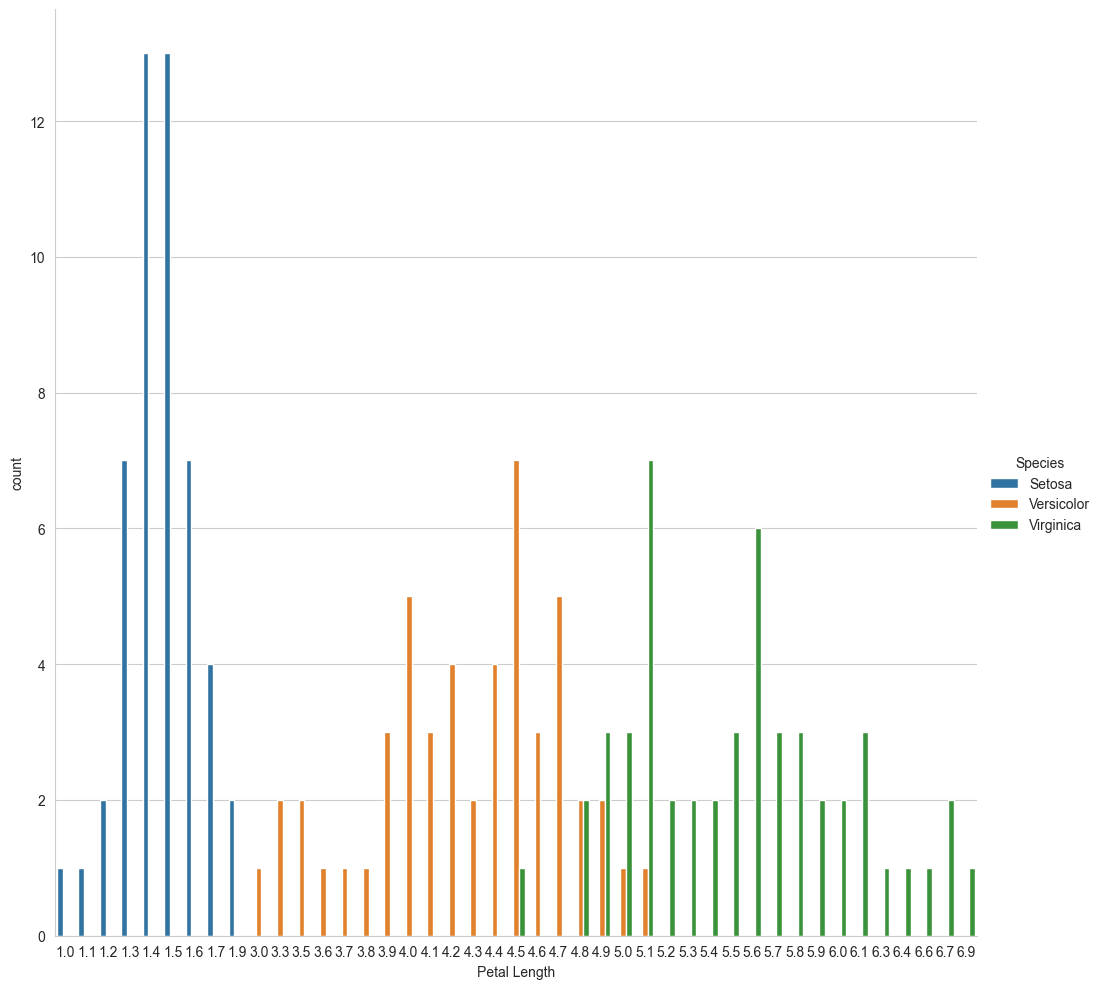

In [15]:
sns.catplot(x='Petal Length',data=iris,hue = 'Species',kind='count',height=10)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
logreg = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [18]:

logreg.fit(X_train,Y_train)

LogisticRegression()

In [19]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)

In [20]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


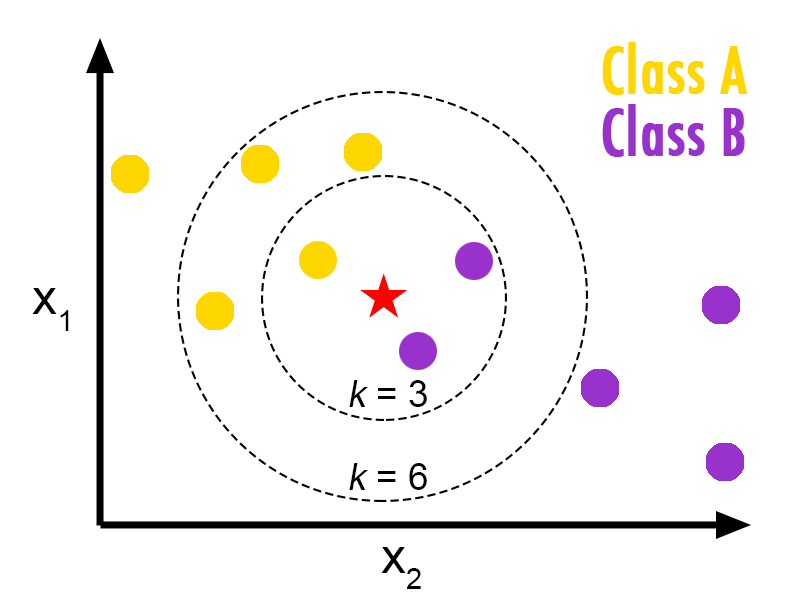

In [21]:
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

In [24]:
#from.sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)

In [26]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [27]:
Y_pred = knn.predict(X_test)

In [28]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [30]:
k_range = range(1,21)
accuracy=[]

In [33]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

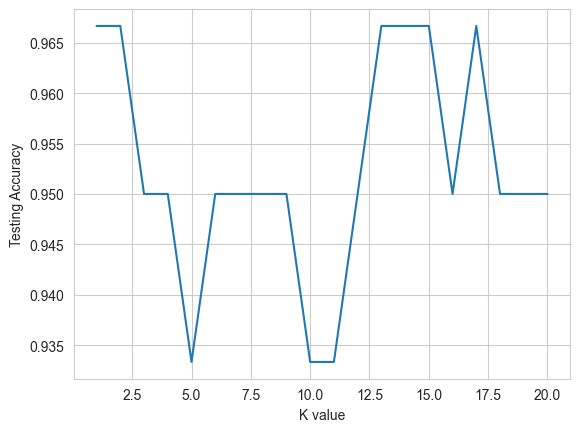

In [34]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')